# Get weather data
In this notebook, we will gather data according to the tutorial presented in https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-1/, but we will use openweather insted of the weather underground's data. We can also check on the docs folder in the main tree of this file to see further references in the topic.

### Data
Notice the above apis just provide free access to daily weather reports. For a historic context it has been very difficult to find. Darksky went Apple this year, and OpenWeather is charging 10 bucks for historical data for a particular location. Luckily, the website of the NOAA does provide api access as well as the posibility of downloading data for a particular location in a variety of formats like csv or even json files.
I have downloaded data for Limon from 1990 until 04/2020 in a csv file. The data downloaded is simple precipitation and air temperature data, on monthly basis.

In [21]:
datafile = 'data/2154121.csv';


In [36]:
import csv
with open(datafile) as csvfile:
    records = csv.DictReader(csvfile)
    print(records.fieldnames)
    for row in records:
        print(row['DATE'], row['TMAX'])

['STATION', 'NAME', 'DATE', 'CDSD', 'EMNT', 'EMXP', 'EMXT', 'HDSD', 'PRCP', 'TAVG', 'TMAX', 'TMIN']
1990-01 28.6
1990-02 28.7
1990-03 28.8
1990-04 29.9
1990-05 29.3
1990-06 29.4
1990-07 29.1
1990-08 29.3
1990-09 30.3
1990-10 30.6
1990-11 29.7
1990-12 28.3
1991-01 28.6
1991-02 28.5
1991-03 29.4
1991-04 29.6
1991-05 29.5
1991-06 30.1
1991-07 29.1
1991-08 29.0
1991-09 29.5
1991-10 30.1
1991-11 28.2
1991-12 28.4
1992-01 28.4
1992-02 29.0
1992-03 29.1
1992-04 29.5
1992-05 29.8
1992-06 31.1
1992-07 29.4
1992-08 29.1
1992-09 30.2
1992-10 29.6
1992-11 30.1
1992-12 29.3
1993-01 28.7
1993-02 29.3
1993-03 29.2
1993-04 30.8
1993-05 31.3
1993-06 30.3
1993-07 29.2
1993-08 29.7
1993-09 29.8
1993-10 30.1
1993-11 29.6
1993-12 28.9
1994-01 29.0
1994-02 28.5
1994-03 29.9
1994-04 29.6
1994-05 30.3
1994-06 29.0
1994-07 28.2
1994-08 29.6
1994-09 29.5
1994-10 30.0
1994-11 29.4
1994-12 28.3
1995-01 28.9
1995-02 28.6
1995-03 29.8
1995-04 29.9
1995-05 30.6
1995-06 30.6
1995-07 30.2
1995-08 30.8
1995-09 30.7
199

The field names of the csv file include the station identifier, its name, and the date (month) of the measurement, and it also includes:

|Field|Description
|--- | ---
|EMXP | Extreme maximum precipitation for the period.
|EMXT | Extreme maximum temperature for the period.
|TMAX | Maximum temperature
|TAVG | Average Temperature.
|TMIN | Minimum temperature
|PRCP | Precipitation
|HDSD | Heating Degree Days Season to Date
|CDSD | Cooling Degree Days Season to Date
|EMNT | Extreme minimum temperature for the period.

Now we are going to put everything in Pandas

In [56]:
import pandas
#dataframe = pandas.DataFrame([records], index=None)
#fieldnames=['DATE','TAVG','PRCP'])
#To do: from read, and DictRead to Pandas.
#Take into account that DictRead does create a dictionary object (keys-hash)

dataraw = pandas.read_csv(datafile)
dataframe = pandas.DataFrame(dataraw, columns=['DATE','TAVG','PRCP'])

print(dataframe[:10])

      DATE  TAVG   PRCP
0  1990-01  25.1  501.3
1  1990-02  24.8  109.1
2  1990-03  25.2  293.0
3  1990-04  26.0  148.6
4  1990-05  26.3  749.6
5  1990-06  26.4  572.4
6  1990-07  26.1  279.5
7  1990-08  26.2  690.7
8  1990-09  26.7  181.1
9  1990-10  26.6  152.8


### Data distributions
Now that we have the data, lets plot some values.

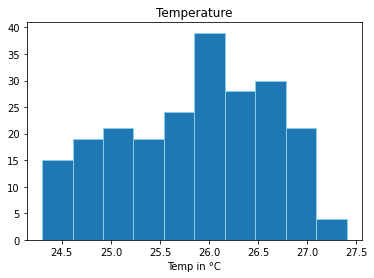

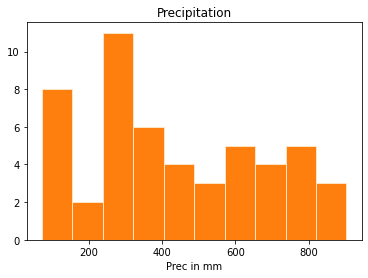

In [68]:
import matplotlib.pyplot as plt
# Temperature distribution 
#fig, axs = plt.subplots(1,2,sharex=False, sharey=False);
#fig.suptitle('Data distributions');
#axs[0].set_title('Temperature');
#axs[0].set_xlabel('Temp in °C');
#plt.hist(dataframe.TAVG)
#dataframe.TAVG.hist();
#axs[1].set_title('Precipitation');
#axs[1].set_xlabel('Prec in mm');
#plt.hist(dataframe.PRCP)
#dataframe.PRCP.hist();

plt.figure()
#dataframe.TAVG.hist();
plt.hist(dataframe.TAVG, color='tab:blue', ec='skyblue');
plt.title('Temperature');
plt.xlabel('Temp in °C');
plt.show();

plt.figure()
#dataframe.PRCP.hist();
plt.hist(dataframe.PRCP, color='tab:orange', ec='bisque');
plt.title('Precipitation');
plt.xlabel('Prec in mm');
plt.show();


Now with the magic of pandas, we can check the temperature and precipitation change per year

          DATE  TAVG   PRCP
0   1990-01-01  25.1  501.3
1   1990-02-01  24.8  109.1
2   1990-03-01  25.2  293.0
3   1990-04-01  26.0  148.6
4   1990-05-01  26.3  749.6
..         ...   ...    ...
228 2018-12-01  24.9    NaN
229 2019-03-01   NaN  274.2
230 2019-10-01  26.0    NaN
231 2019-11-01  26.0    NaN
232 2020-02-01  25.0    NaN

[233 rows x 3 columns]


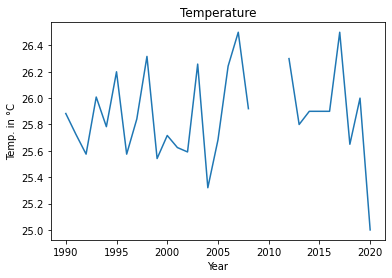

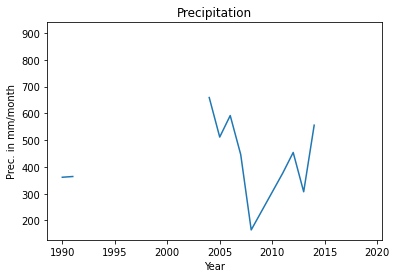

In [94]:
df=dataframe;
df['DATE']=pandas.to_datetime(df.DATE);
plt.figure(); plt.title('Temperature'); plt.xlabel('Year');  plt.ylabel('Temp. in °C');
plt.plot(df.groupby(df.DATE.dt.year)['TAVG'].mean());
plt.figure(); plt.title('Precipitation'); plt.xlabel('Year'); plt.ylabel('Prec. in mm/month');
plt.plot(df.groupby(df.DATE.dt.year)['PRCP'].mean());


In [77]:
print(j)

0      25.883333
1      25.883333
2      25.883333
3      25.883333
4      25.883333
         ...    
228    25.650000
229    26.000000
230    26.000000
231    26.000000
232    25.000000
Name: TAVG, Length: 233, dtype: float64
